In [375]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import locale

In [376]:
data = pd.read_csv("data/df.csv", index_col=0)

In [377]:
data

,MovieID,Title,Studio,Franquicias,Year,ReleaseDate,Runtime,Lifetime Gross,Budget,puntuacion,cantidad de votos,FranchiseID
0,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,1977,05-25-77,121.00,775398007.00,11000000,7.90,137184,101
1,1002,Star Wars: Episode V - The Empire Strikes Back,Lucasfilm,Star Wars,1980,06-20-80,124.00,538375067.00,18000000,8.10,136665,101
2,1003,Star Wars: Episode VI - Return of the Jedi,Lucasfilm,Star Wars,1983,05-25-83,135.00,475106177.00,32500000,7.90,122877,101
3,1004,Jurassic Park,Universal Pictures,Jurassic Park,1993,06-11-93,127.00,1109802321.00,63000000,7.10,147830,102
4,1005,The Lost World: Jurassic Park,Universal Pictures,Jurassic Park,1997,05-23-97,129.00,618638999.00,73000000,5.70,50840,102
5,1006,Star Wars: Episode I - The Phantom Menace,Lucasfilm,Star Wars,1999,05-19-99,136.00,1027082707.00,115000000,6.20,103888,101
6,1007,Jurassic Park III,Universal Pictures,Jurassic Park,2001,07-18-01,92.00,368780809.00,93000000,4.80,33791,102
7,1008,Harry Potter and the Sorcerer's Stone,Warner Bros.,Harry Potter,2001,11-16-01,152.00,1022290019.00,125000000,6.80,85073,103
8,1009,The Lord of the Rings: The Fellowship of the Ring,WingNut Films,El señor de los anillos,2001,12-18-01,179.00,898094742.00,93000000,8.00,192446,104
9,1010,Star Wars: Episode II - Attack of the Clones,Lucasfilm,Star Wars,2002,05-15-02,142.00,653779970.00,120000000,6.30,107369,101


In [378]:
pd.set_option("display.max_rows", 610)

In [379]:
data["Rentabilidad"] = data["Lifetime Gross"] - data["Budget"]
data["'%'Rentabilidad"] = round(((data["Lifetime Gross"] - data["Budget"] ) / data["Budget"]) * 100)
data["Lifetime Gross"] = data["Lifetime Gross"].apply(lambda x: locale.format("%d", x, grouping=True))
data["Rentabilidad"] = data["Rentabilidad"].apply(lambda x: locale.format("%d", x, grouping=True))
data["Lifetime Gross"] = data["Lifetime Gross"].astype(float)
data["Rentabilidad"] = data["Rentabilidad"].astype(float)
data["Lifetime Gross"] = round(data["Lifetime Gross"].astype(float),3)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\602284956.py:3: DeprecationWarning: This method will be removed in a future version of Python. Use 'locale.format_string()' instead.
  data["Lifetime Gross"] = data["Lifetime Gross"].apply(lambda x: locale.format("%d", x, grouping=True))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\602284956.py:4: DeprecationWarning: This method will be removed in a future version of Python. Use 'locale.format_string()' instead.
  data["Rentabilidad"] = data["Rentabilidad"].apply(lambda x: locale.format("%d", x, grouping=True))


In [380]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 0 to 64
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MovieID            65 non-null     int64  
 1   Title              65 non-null     object 
 2   Studio             65 non-null     object 
 3   Franquicias        65 non-null     object 
 4   Year               65 non-null     int64  
 5   ReleaseDate        65 non-null     object 
 6   Runtime            65 non-null     float64
 7   Lifetime Gross     65 non-null     float64
 8   Budget             65 non-null     int64  
 9   puntuacion         65 non-null     float64
 10  cantidad de votos  65 non-null     int64  
 11  FranchiseID        65 non-null     int64  
 12  Rentabilidad       65 non-null     float64
 13  '%'Rentabilidad    65 non-null     float64
dtypes: float64(5), int64(5), object(4)
memory usage: 7.6+ KB


In [381]:
pd.options.display.float_format = '{:.2f}'.format

In [382]:
data.head(2)

,MovieID,Title,Studio,Franquicias,Year,ReleaseDate,Runtime,Lifetime Gross,Budget,puntuacion,cantidad de votos,FranchiseID,Rentabilidad,'%'Rentabilidad
0,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,1977,05-25-77,121.00,775398007.00,11000000,7.90,137184,101,764398007.00,6949.00
1,1002,Star Wars: Episode V - The Empire Strikes Back,Lucasfilm,Star Wars,1980,06-20-80,124.00,538375067.00,18000000,8.10,136665,101,520375067.00,2891.00


In [383]:
franquicias = data.groupby("Franquicias")

In [384]:
data_franquicias = franquicias.agg({"Lifetime Gross": ["sum", "mean"],
                                    "Budget": ["sum", "mean"],
                                    "Rentabilidad": "sum",
                                    "'%'Rentabilidad": "mean",
                                    "puntuacion": "mean"}).reset_index()

In [385]:
numero_peliculas = [6,8,5,6,11,29]

In [386]:
data_franquicias["Número de películas"] = numero_peliculas

In [387]:
data_franquicias.columns = ["Franquicias", "Suma Facturación", "Media Facturación", "Suma Presupuesto", "Media Presupuesto","Rentabilidad", "'%' Rentabilidad", "Puntuación Media", "Número de películas"]

In [388]:
data_franquicias

,Franquicias,Suma Facturación,Media Facturación,Suma Presupuesto,Media Presupuesto,Rentabilidad,'%' Rentabilidad,Puntuación Media,Número de películas
0,El señor de los anillos,5930687178.00,988447863.00,1016000000,169333333.33,4914687178.00,660.33,7.37,6
1,Harry Potter,7792724634.00,974090579.25,1280000000,160000000.00,6512724634.00,572.12,6.65,8
2,Indiana Jones,2362769581.00,472553916.20,579000000,115800000.00,1783769581.00,879.00,6.96,5
3,Jurassic Park,6077008329.00,1012834721.50,714000000,119000000.00,5363008329.00,816.00,5.65,6
4,Star Wars,10266109246.00,933282658.73,1782500000,162045454.55,8483609246.00,1342.45,6.80,11
5,U.C Marvel,27432639035.00,945953070.17,5722000000,197310344.83,21710639035.00,362.14,6.20,29


In [389]:
data

,MovieID,Title,Studio,Franquicias,Year,ReleaseDate,Runtime,Lifetime Gross,Budget,puntuacion,cantidad de votos,FranchiseID,Rentabilidad,'%'Rentabilidad
0,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,1977,05-25-77,121.00,775398007.00,11000000,7.90,137184,101,764398007.00,6949.00
1,1002,Star Wars: Episode V - The Empire Strikes Back,Lucasfilm,Star Wars,1980,06-20-80,124.00,538375067.00,18000000,8.10,136665,101,520375067.00,2891.00
2,1003,Star Wars: Episode VI - Return of the Jedi,Lucasfilm,Star Wars,1983,05-25-83,135.00,475106177.00,32500000,7.90,122877,101,442606177.00,1362.00
3,1004,Jurassic Park,Universal Pictures,Jurassic Park,1993,06-11-93,127.00,1109802321.00,63000000,7.10,147830,102,1046802321.00,1662.00
4,1005,The Lost World: Jurassic Park,Universal Pictures,Jurassic Park,1997,05-23-97,129.00,618638999.00,73000000,5.70,50840,102,545638999.00,747.00
5,1006,Star Wars: Episode I - The Phantom Menace,Lucasfilm,Star Wars,1999,05-19-99,136.00,1027082707.00,115000000,6.20,103888,101,912082707.00,793.00
6,1007,Jurassic Park III,Universal Pictures,Jurassic Park,2001,07-18-01,92.00,368780809.00,93000000,4.80,33791,102,275780809.00,297.00
7,1008,Harry Potter and the Sorcerer's Stone,Warner Bros.,Harry Potter,2001,11-16-01,152.00,1022290019.00,125000000,6.80,85073,103,897290019.00,718.00
8,1009,The Lord of the Rings: The Fellowship of the Ring,WingNut Films,El señor de los anillos,2001,12-18-01,179.00,898094742.00,93000000,8.00,192446,104,805094742.00,866.00
9,1010,Star Wars: Episode II - Attack of the Clones,Lucasfilm,Star Wars,2002,05-15-02,142.00,653779970.00,120000000,6.30,107369,101,533779970.00,445.00


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\2253657691.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graf_facturacion = sns.barplot(data=data_franquicias, x="Franquicias", y="Suma Facturación", palette=colores, legend=False)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\2253657691.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graf_facturacion.set_yticklabels(valores_y)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\2253657691.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graf_facturacion.set_xticklabels(graf_facturacion.get_xticklabels(), rotation=35)


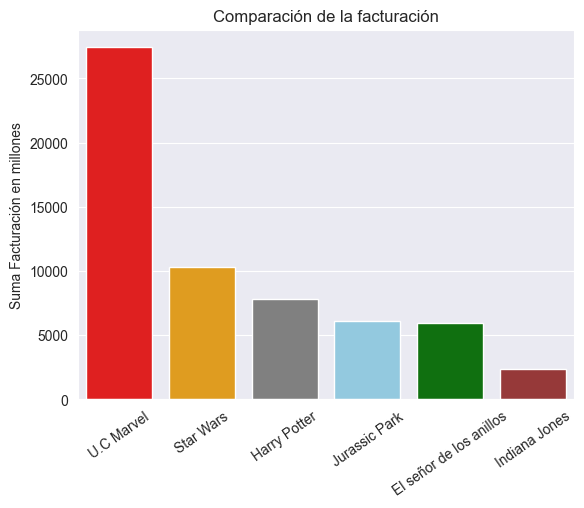

In [390]:
colores = ["red","orange","grey","skyblue","green","brown"]
sns.set_style('darkgrid')
data_franquicias = data_franquicias.sort_values(by="Suma Facturación", ascending=False)
graf_facturacion = sns.barplot(data=data_franquicias, x="Franquicias", y="Suma Facturación", palette=colores, legend=False)
valores_y = ["0","5000","10000","15000","20000","25000"]
graf_facturacion.set_yticklabels(valores_y)
plt.ylabel("Suma Facturación en millones")
plt.xlabel("")
graf_facturacion.set_xticklabels(graf_facturacion.get_xticklabels(), rotation=35)
graf_facturacion.set_title("Comparación de la facturación");

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\1271262912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graf_numpeliculas = sns.barplot(data=data_franquicias, x="Franquicias", y="Número de películas", palette=colores)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\1271262912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graf_numpeliculas.set_xticklabels(graf_numpeliculas.get_xticklabels(), rotation=35)


Text(0.5, 1.0, 'Comparación del número de peliculas')

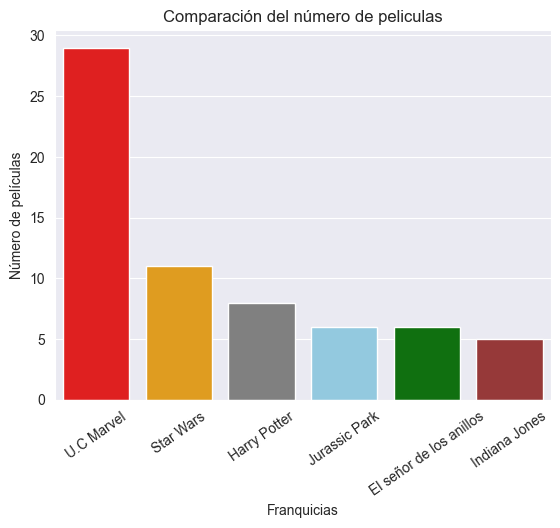

In [391]:
colores = ["red","orange","grey","skyblue","green","brown"]
data_franquicias = data_franquicias.sort_values(by="Número de películas", ascending=False)
graf_numpeliculas = sns.barplot(data=data_franquicias, x="Franquicias", y="Número de películas", palette=colores)
graf_numpeliculas.set_xticklabels(graf_numpeliculas.get_xticklabels(), rotation=35)
graf_numpeliculas.set_title('Comparación del número de peliculas')

In [392]:
data["Budget"].max()

400000000

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\793215567.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graf_presupuesto = sns.barplot(data=data_franquicias, x="Franquicias", y="Suma Presupuesto", palette=colores)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\793215567.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graf_presupuesto.set_yticklabels(valores_y)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\793215567.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graf_presupuesto.set_xticklabels(graf_presupuesto.get_xticklabels(), rotation=35)


Text(0.5, 1.0, 'Comparación de presupuestos')

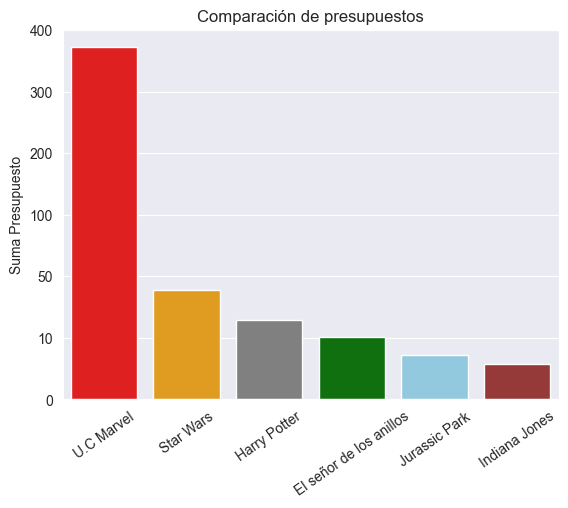

In [393]:
colores = ["red","orange","grey","green","skyblue","brown"]
data_franquicias = data_franquicias.sort_values(by="Suma Presupuesto", ascending=False)
valores_y = ["0","10","50","100","200","300","400","500"]
graf_presupuesto = sns.barplot(data=data_franquicias, x="Franquicias", y="Suma Presupuesto", palette=colores)
graf_presupuesto.set_yticklabels(valores_y)
plt.xlabel("")
graf_presupuesto.set_xticklabels(graf_presupuesto.get_xticklabels(), rotation=35)
graf_presupuesto.set_title('Comparación de presupuestos')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\2865713593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graf_presupuesto = sns.barplot(data=data_franquicias, x="Franquicias", y="'%' Rentabilidad", palette=colores, legend=False)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\2865713593.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graf_presupuesto.set_xticklabels(graf_presupuesto.get_xticklabels(), rotation=35)


Text(0.5, 1.0, 'Media % Rentabilidad')

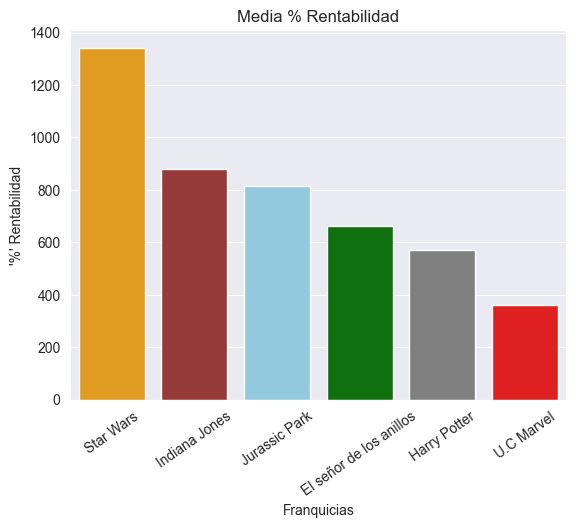

In [394]:
colores = ["orange","brown","skyblue","green","grey","red"]
data_franquicias = data_franquicias.sort_values(by="'%' Rentabilidad", ascending=False)
graf_presupuesto = sns.barplot(data=data_franquicias, x="Franquicias", y="'%' Rentabilidad", palette=colores, legend=False)
graf_presupuesto.set_xticklabels(graf_presupuesto.get_xticklabels(), rotation=35)
graf_presupuesto.set_title('Media % Rentabilidad')

In [395]:
data_franquicias

,Franquicias,Suma Facturación,Media Facturación,Suma Presupuesto,Media Presupuesto,Rentabilidad,'%' Rentabilidad,Puntuación Media,Número de películas
4,Star Wars,10266109246.00,933282658.73,1782500000,162045454.55,8483609246.00,1342.45,6.80,11
2,Indiana Jones,2362769581.00,472553916.20,579000000,115800000.00,1783769581.00,879.00,6.96,5
3,Jurassic Park,6077008329.00,1012834721.50,714000000,119000000.00,5363008329.00,816.00,5.65,6
0,El señor de los anillos,5930687178.00,988447863.00,1016000000,169333333.33,4914687178.00,660.33,7.37,6
1,Harry Potter,7792724634.00,974090579.25,1280000000,160000000.00,6512724634.00,572.12,6.65,8
5,U.C Marvel,27432639035.00,945953070.17,5722000000,197310344.83,21710639035.00,362.14,6.20,29


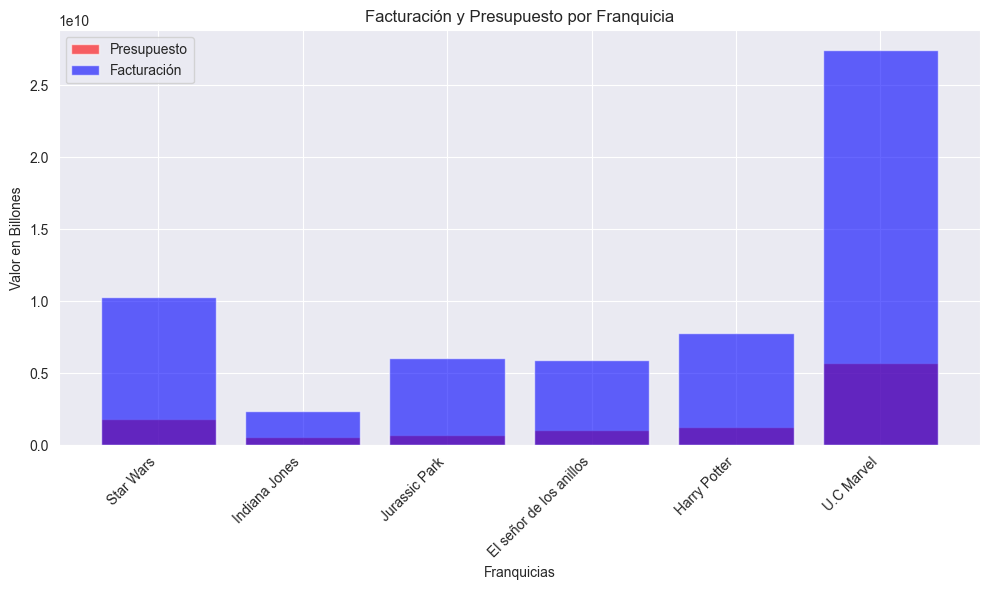

In [396]:
plt.figure(figsize=(10, 6))
plt.bar(data_franquicias["Franquicias"], data_franquicias["Suma Presupuesto"], label="Presupuesto", color='r', alpha=0.6)
plt.bar(data_franquicias["Franquicias"], data_franquicias["Suma Facturación"], label="Facturación", color='b', alpha=0.6)

plt.xlabel('Franquicias')
plt.ylabel('Valor en Billones')
plt.title('Facturación y Presupuesto por Franquicia')
plt.xticks(rotation=45, ha='right')

plt.legend()

plt.tight_layout()
plt.show()


In [397]:
data.head(1)

,MovieID,Title,Studio,Franquicias,Year,ReleaseDate,Runtime,Lifetime Gross,Budget,puntuacion,cantidad de votos,FranchiseID,Rentabilidad,'%'Rentabilidad
0,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,1977,05-25-77,121.00,775398007.00,11000000,7.90,137184,101,764398007.00,6949.00


In [398]:
# Comparancion con scatter plot de la dispersion de presupuestos y facturaciones entre franquicias

In [399]:
data_franquicias

,Franquicias,Suma Facturación,Media Facturación,Suma Presupuesto,Media Presupuesto,Rentabilidad,'%' Rentabilidad,Puntuación Media,Número de películas
4,Star Wars,10266109246.00,933282658.73,1782500000,162045454.55,8483609246.00,1342.45,6.80,11
2,Indiana Jones,2362769581.00,472553916.20,579000000,115800000.00,1783769581.00,879.00,6.96,5
3,Jurassic Park,6077008329.00,1012834721.50,714000000,119000000.00,5363008329.00,816.00,5.65,6
0,El señor de los anillos,5930687178.00,988447863.00,1016000000,169333333.33,4914687178.00,660.33,7.37,6
1,Harry Potter,7792724634.00,974090579.25,1280000000,160000000.00,6512724634.00,572.12,6.65,8
5,U.C Marvel,27432639035.00,945953070.17,5722000000,197310344.83,21710639035.00,362.14,6.20,29


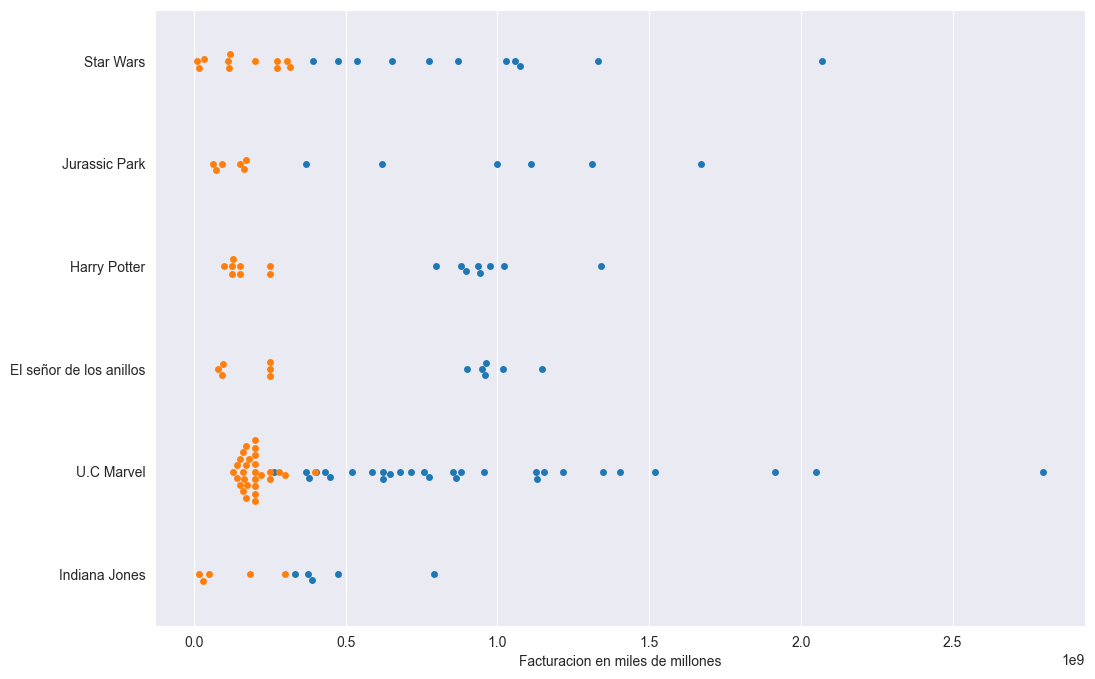

In [400]:
valores = ["0","5000","10000","15000","20000","25000"]
plt.figure(figsize=(12, 8))
sns.swarmplot(x="Lifetime Gross", y= "Franquicias", data=data)
sns.swarmplot(x="Budget", y= "Franquicias", data=data)
plt.ylabel("")
#plt.xtickslabel(valores)
plt.xlabel("Facturacion en miles de millones");

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\2752194554.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  swarm.set_xticklabels([666,0,5000,10000,15000,20000,25000])


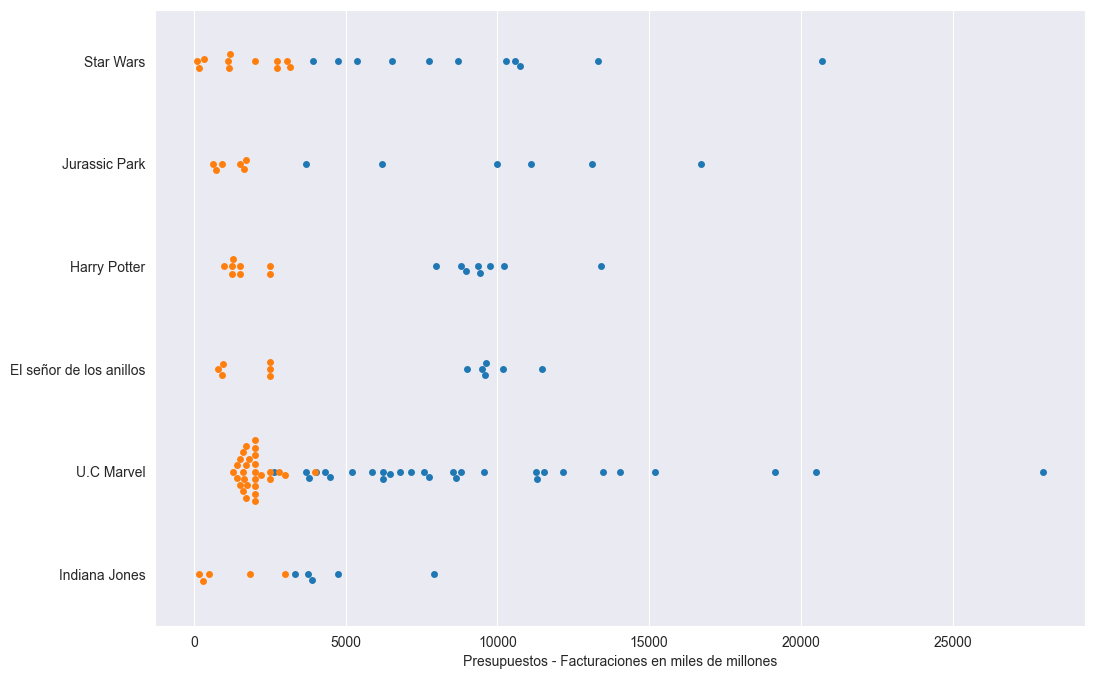

In [401]:
plt.figure(figsize=(12,8))
swarm = sns.swarmplot(data=data, x="Lifetime Gross", y="Franquicias")
swarm = sns.swarmplot(data=data, x="Budget", y="Franquicias")
swarm.set_xticklabels([666,0,5000,10000,15000,20000,25000])
plt.ylabel("")
plt.xlabel("Presupuestos - Facturaciones en miles de millones");

In [402]:
data.head(1)

,MovieID,Title,Studio,Franquicias,Year,ReleaseDate,Runtime,Lifetime Gross,Budget,puntuacion,cantidad de votos,FranchiseID,Rentabilidad,'%'Rentabilidad
0,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,1977,05-25-77,121.00,775398007.00,11000000,7.90,137184,101,764398007.00,6949.00


<Axes: >

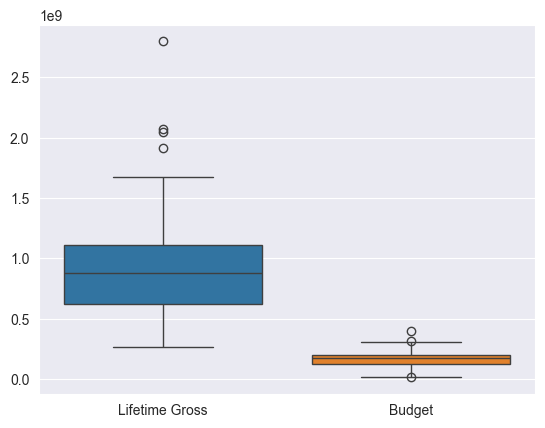

In [403]:
sns.boxplot(data=data[["Lifetime Gross","Budget"]])

<Axes: ylabel='Lifetime Gross'>

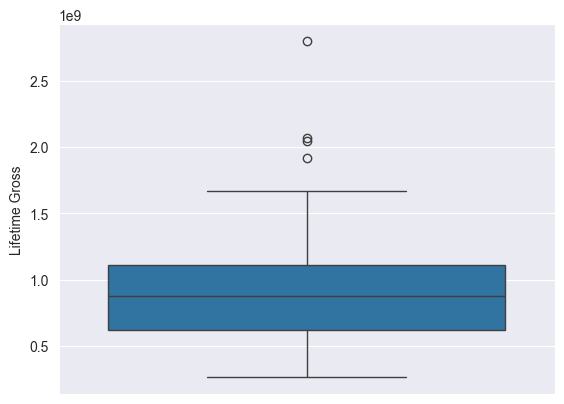

In [404]:
sns.boxplot(data=data["Lifetime Gross"])

<Axes: ylabel='Budget'>

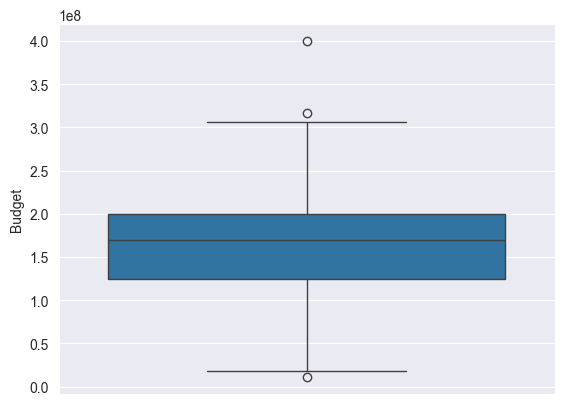

In [405]:
sns.boxplot(data=data["Budget"])

In [406]:
data.head(1)

,MovieID,Title,Studio,Franquicias,Year,ReleaseDate,Runtime,Lifetime Gross,Budget,puntuacion,cantidad de votos,FranchiseID,Rentabilidad,'%'Rentabilidad
0,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,1977,05-25-77,121.00,775398007.00,11000000,7.90,137184,101,764398007.00,6949.00


<Axes: >

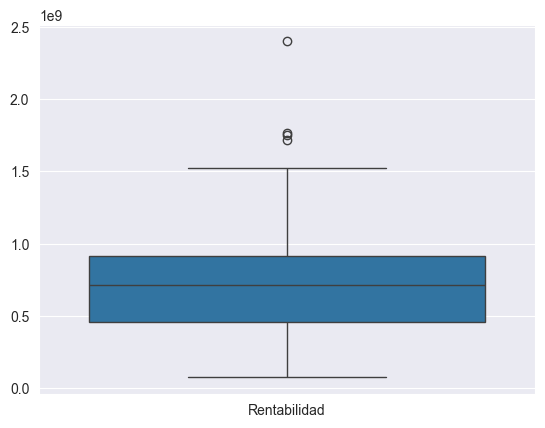

In [407]:
sns.boxplot(data=data[["Rentabilidad"]])

<Axes: >

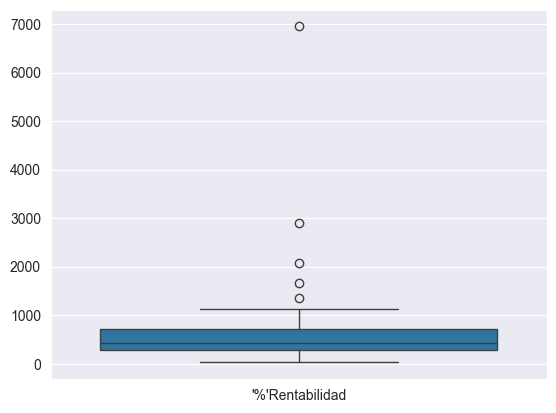

In [408]:
sns.boxplot(data=data[["'%'Rentabilidad"]])

In [409]:
data.head(1)

,MovieID,Title,Studio,Franquicias,Year,ReleaseDate,Runtime,Lifetime Gross,Budget,puntuacion,cantidad de votos,FranchiseID,Rentabilidad,'%'Rentabilidad
0,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,1977,05-25-77,121.00,775398007.00,11000000,7.90,137184,101,764398007.00,6949.00


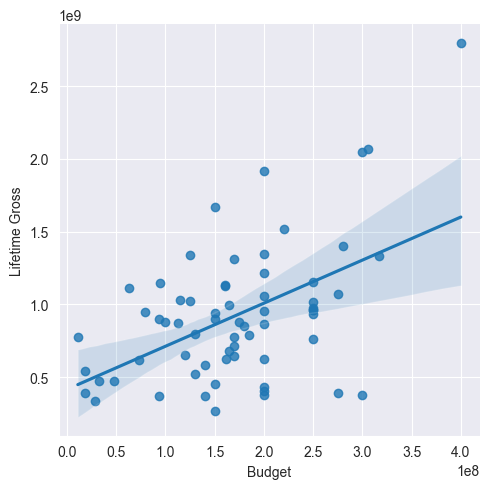

In [410]:
sns.lmplot(data=data ,x="Budget" , y="Lifetime Gross");

In [411]:
data_franquicias.head(1)

,Franquicias,Suma Facturación,Media Facturación,Suma Presupuesto,Media Presupuesto,Rentabilidad,'%' Rentabilidad,Puntuación Media,Número de películas
4,Star Wars,10266109246.00,933282658.73,1782500000,162045454.55,8483609246.00,1342.45,6.80,11


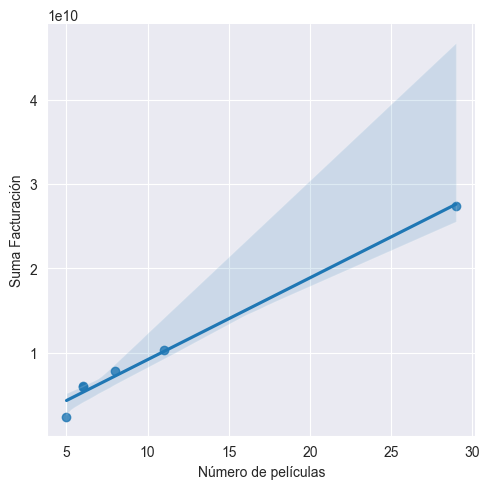

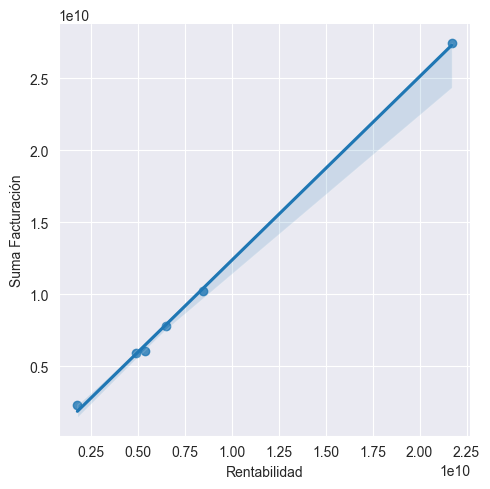

In [412]:
sns.lmplot(data=data_franquicias ,x="Número de películas" , y="Suma Facturación");
sns.lmplot(data=data_franquicias ,x="Rentabilidad" , y="Suma Facturación");

In [413]:
data.head(1)

,MovieID,Title,Studio,Franquicias,Year,ReleaseDate,Runtime,Lifetime Gross,Budget,puntuacion,cantidad de votos,FranchiseID,Rentabilidad,'%'Rentabilidad
0,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,1977,05-25-77,121.00,775398007.00,11000000,7.90,137184,101,764398007.00,6949.00


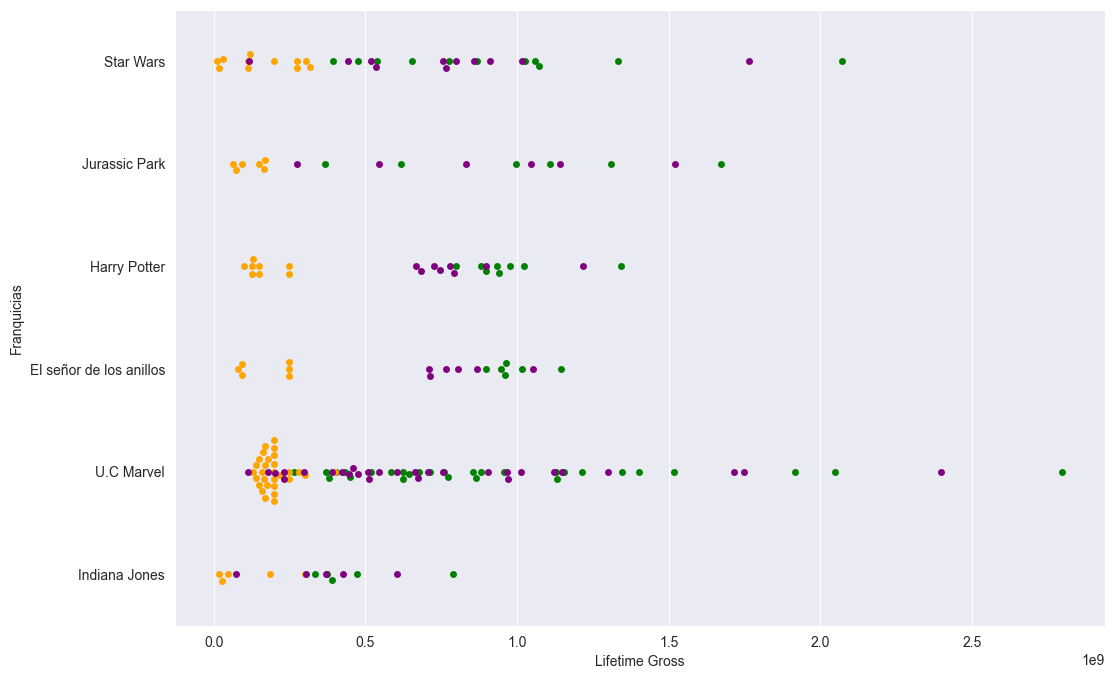

In [414]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x="Lifetime Gross", y="Franquicias", data=data , color="green")
sns.swarmplot(x="Budget", y= "Franquicias", data=data , color="orange");
sns.swarmplot(x="Rentabilidad", y= "Franquicias", data=data ,color="purple");

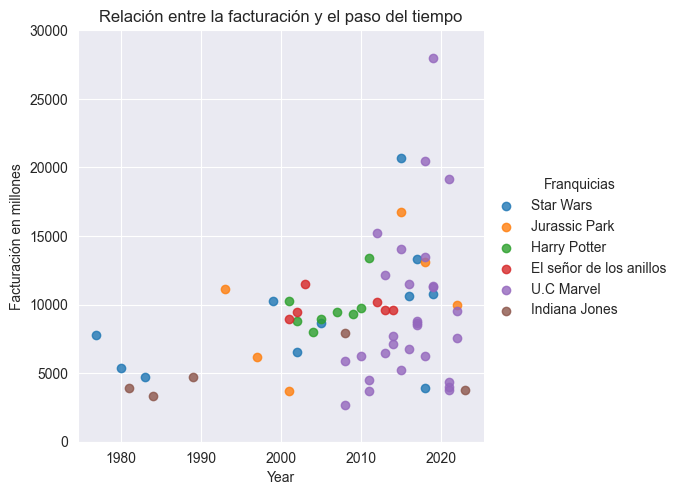

In [415]:
años_facturacion = sns.lmplot(data=data ,x="Year" , y="Lifetime Gross",fit_reg=False, hue="Franquicias")
valores_y = ["0","5000","10000","15000","20000","25000","30000"]
años_facturacion.set_yticklabels(valores_y)
plt.title("Relación entre la facturación y el paso del tiempo")
plt.ylabel("Facturación en millones");

In [416]:
data["Budget"].min()

11000000

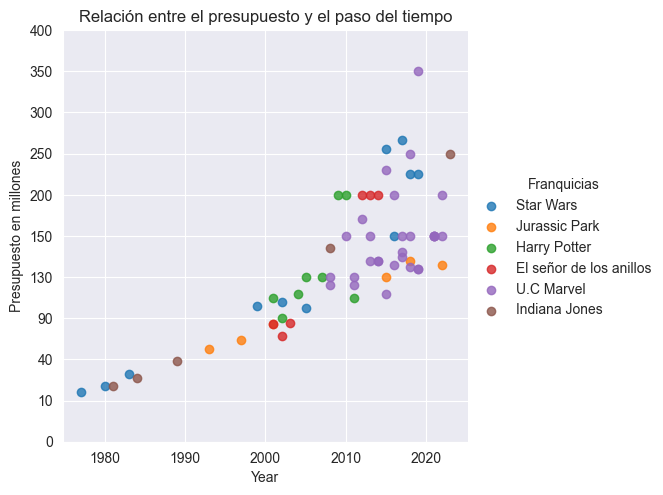

In [417]:
años_presupuesto = sns.lmplot(data=data ,x="Year" , y="Budget",fit_reg=False, hue="Franquicias");
valores_y = ["0","10","40","90","130","150","200","250","300","350","400"]
años_presupuesto.set_yticklabels(valores_y)
plt.title("Relación entre el presupuesto y el paso del tiempo")
plt.ylabel("Presupuesto en millones");

In [418]:
data.head(1)

,MovieID,Title,Studio,Franquicias,Year,ReleaseDate,Runtime,Lifetime Gross,Budget,puntuacion,cantidad de votos,FranchiseID,Rentabilidad,'%'Rentabilidad
0,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,1977,05-25-77,121.00,775398007.00,11000000,7.90,137184,101,764398007.00,6949.00


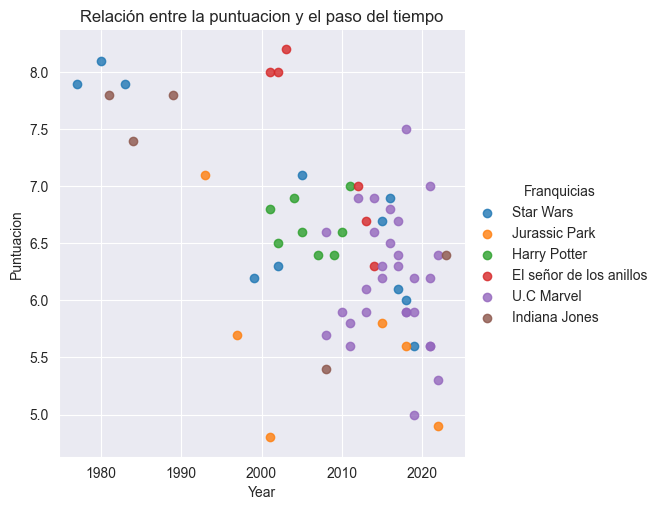

In [419]:
años_puntuacion = sns.lmplot(data=data ,x="Year" , y="puntuacion",fit_reg=False, hue="Franquicias")
plt.title("Relación entre la puntuacion y el paso del tiempo")
plt.ylabel("Puntuacion");


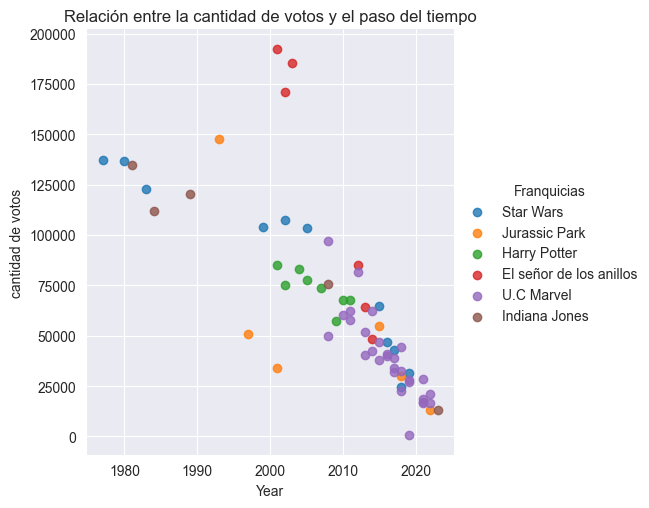

In [420]:
sns.lmplot(data=data ,x="Year" , y="cantidad de votos",fit_reg=False, hue="Franquicias");
plt.title("Relación entre la cantidad de votos y el paso del tiempo");


In [421]:
data_franquicias

,Franquicias,Suma Facturación,Media Facturación,Suma Presupuesto,Media Presupuesto,Rentabilidad,'%' Rentabilidad,Puntuación Media,Número de películas
4,Star Wars,10266109246.00,933282658.73,1782500000,162045454.55,8483609246.00,1342.45,6.80,11
2,Indiana Jones,2362769581.00,472553916.20,579000000,115800000.00,1783769581.00,879.00,6.96,5
3,Jurassic Park,6077008329.00,1012834721.50,714000000,119000000.00,5363008329.00,816.00,5.65,6
0,El señor de los anillos,5930687178.00,988447863.00,1016000000,169333333.33,4914687178.00,660.33,7.37,6
1,Harry Potter,7792724634.00,974090579.25,1280000000,160000000.00,6512724634.00,572.12,6.65,8
5,U.C Marvel,27432639035.00,945953070.17,5722000000,197310344.83,21710639035.00,362.14,6.20,29


In [422]:
starwars = data[data["FranchiseID"] == 101]
starwars.head(2)

,MovieID,Title,Studio,Franquicias,Year,ReleaseDate,Runtime,Lifetime Gross,Budget,puntuacion,cantidad de votos,FranchiseID,Rentabilidad,'%'Rentabilidad
0,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,1977,05-25-77,121.00,775398007.00,11000000,7.90,137184,101,764398007.00,6949.00
1,1002,Star Wars: Episode V - The Empire Strikes Back,Lucasfilm,Star Wars,1980,06-20-80,124.00,538375067.00,18000000,8.10,136665,101,520375067.00,2891.00


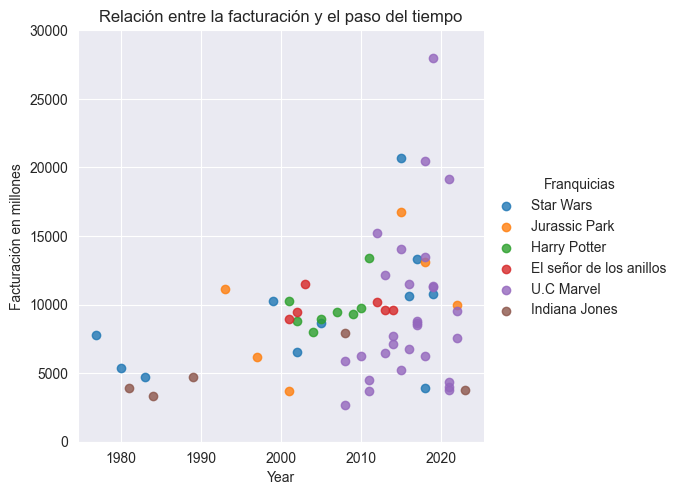

In [423]:
años_facturacion = sns.lmplot(data=data ,x="Year" , y="Lifetime Gross",fit_reg=False, hue="Franquicias")
valores_y = ["0","5000","10000","15000","20000","25000","30000"]
años_facturacion.set_yticklabels(valores_y)
plt.title("Relación entre la facturación y el paso del tiempo")
plt.ylabel("Facturación en millones");

In [424]:
starwars["Lifetime Gross"].max()

2069521700.0

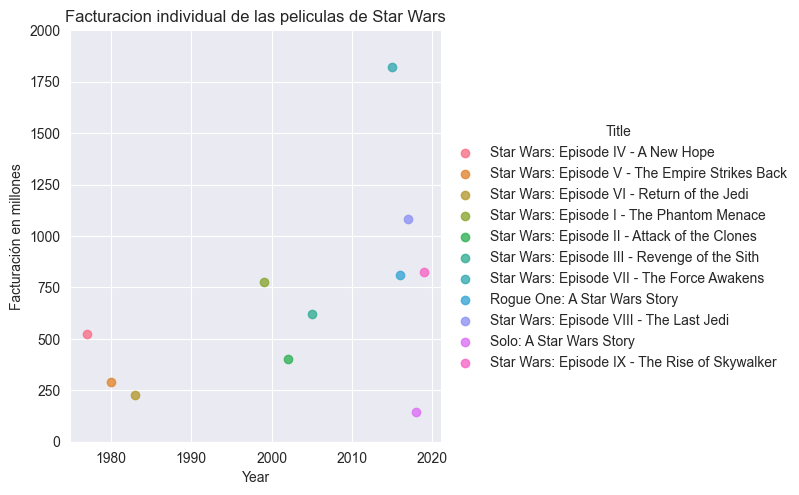

In [446]:
sw_individual = sns.lmplot(data=starwars ,x="Year" , y="Lifetime Gross",fit_reg=False, hue="Title")
valores_y = ["0","250","500","750","1000","1250","1500","1750","2000"]
sw_individual.set_yticklabels(valores_y)
plt.title("Facturacion individual de las peliculas de Star Wars")
plt.ylabel("Facturación en millones");


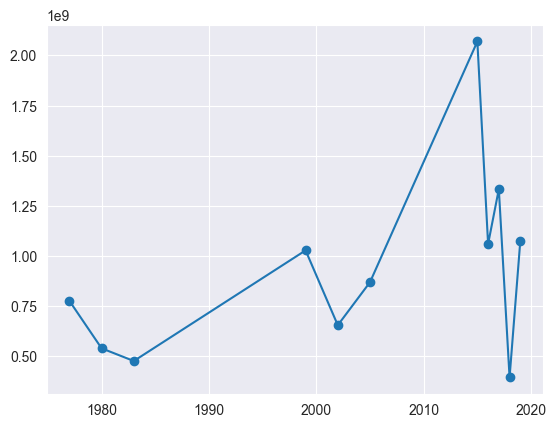

In [426]:
plt.plot("Year" , "Lifetime Gross", data=starwars, linestyle='-', marker='o');

In [427]:
starwars

,MovieID,Title,Studio,Franquicias,Year,ReleaseDate,Runtime,Lifetime Gross,Budget,puntuacion,cantidad de votos,FranchiseID,Rentabilidad,'%'Rentabilidad
0,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,1977,05-25-77,121.00,775398007.00,11000000,7.90,137184,101,764398007.00,6949.00
1,1002,Star Wars: Episode V - The Empire Strikes Back,Lucasfilm,Star Wars,1980,06-20-80,124.00,538375067.00,18000000,8.10,136665,101,520375067.00,2891.00
2,1003,Star Wars: Episode VI - Return of the Jedi,Lucasfilm,Star Wars,1983,05-25-83,135.00,475106177.00,32500000,7.90,122877,101,442606177.00,1362.00
5,1006,Star Wars: Episode I - The Phantom Menace,Lucasfilm,Star Wars,1999,05-19-99,136.00,1027082707.00,115000000,6.20,103888,101,912082707.00,793.00
9,1010,Star Wars: Episode II - Attack of the Clones,Lucasfilm,Star Wars,2002,05-15-02,142.00,653779970.00,120000000,6.30,107369,101,533779970.00,445.00
14,1015,Star Wars: Episode III - Revenge of the Sith,Lucasfilm,Star Wars,2005,05-17-05,140.00,868390560.00,113000000,7.10,103276,101,755390560.00,668.00
36,1037,Star Wars: Episode VII - The Force Awakens,Lucasfilm,Star Wars,2015,12-18-15,136.00,2069521700.00,306000000,6.70,64579,101,1763521700.00,576.00
39,1040,Rogue One: A Star Wars Story,Lucasfilm,Star Wars,2016,12-14-16,133.00,1058682142.00,200000000,6.90,46951,101,858682142.00,429.00
43,1044,Star Wars: Episode VIII - The Last Jedi,Lucasfilm,Star Wars,2017,12-15-17,152.00,1332698830.00,317000000,6.10,42717,101,1015698830.00,320.00
46,1047,Solo: A Star Wars Story,Lucasfilm,Star Wars,2018,05-25-18,135.00,392924807.00,275000000,6.00,24623,101,117924807.00,43.00


In [447]:
starwars

,MovieID,Title,Studio,Franquicias,Year,ReleaseDate,Runtime,Lifetime Gross,Budget,puntuacion,cantidad de votos,FranchiseID,Rentabilidad,'%'Rentabilidad
0,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,1977,05-25-77,121.00,775398007.00,11000000,7.90,137184,101,764398007.00,6949.00
1,1002,Star Wars: Episode V - The Empire Strikes Back,Lucasfilm,Star Wars,1980,06-20-80,124.00,538375067.00,18000000,8.10,136665,101,520375067.00,2891.00
2,1003,Star Wars: Episode VI - Return of the Jedi,Lucasfilm,Star Wars,1983,05-25-83,135.00,475106177.00,32500000,7.90,122877,101,442606177.00,1362.00
5,1006,Star Wars: Episode I - The Phantom Menace,Lucasfilm,Star Wars,1999,05-19-99,136.00,1027082707.00,115000000,6.20,103888,101,912082707.00,793.00
9,1010,Star Wars: Episode II - Attack of the Clones,Lucasfilm,Star Wars,2002,05-15-02,142.00,653779970.00,120000000,6.30,107369,101,533779970.00,445.00
14,1015,Star Wars: Episode III - Revenge of the Sith,Lucasfilm,Star Wars,2005,05-17-05,140.00,868390560.00,113000000,7.10,103276,101,755390560.00,668.00
36,1037,Star Wars: Episode VII - The Force Awakens,Lucasfilm,Star Wars,2015,12-18-15,136.00,2069521700.00,306000000,6.70,64579,101,1763521700.00,576.00
39,1040,Rogue One: A Star Wars Story,Lucasfilm,Star Wars,2016,12-14-16,133.00,1058682142.00,200000000,6.90,46951,101,858682142.00,429.00
43,1044,Star Wars: Episode VIII - The Last Jedi,Lucasfilm,Star Wars,2017,12-15-17,152.00,1332698830.00,317000000,6.10,42717,101,1015698830.00,320.00
46,1047,Solo: A Star Wars Story,Lucasfilm,Star Wars,2018,05-25-18,135.00,392924807.00,275000000,6.00,24623,101,117924807.00,43.00


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\1295758809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  datos_starwars = sns.barplot(data=datos_starwars, x="Lifetime Gross", y="Title" ,palette=colores)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\1295758809.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  datos_starwars.set_xticklabels(valores_x)


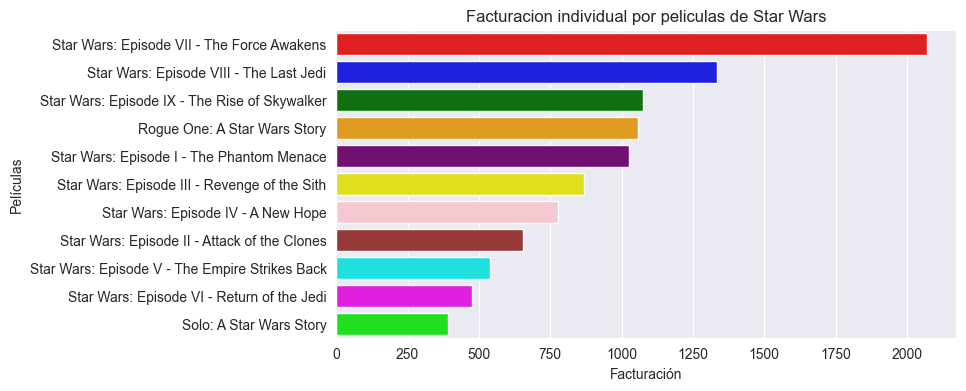

In [428]:
colores=["red","blue","green","orange","purple","yellow","pink","brown","cyan","magenta","lime"]
datos_starwars = starwars.sort_values(by="Lifetime Gross", ascending=False)
plt.figure(figsize=(8, 4))
datos_starwars = sns.barplot(data=datos_starwars, x="Lifetime Gross", y="Title" ,palette=colores)
valores_x = ["0","250","500","750","1000","1250","1500","1750","2000"]
datos_starwars.set_xticklabels(valores_x)
plt.xlabel("Facturación")
plt.ylabel("Películas")
plt.title("Facturacion individual por peliculas de Star Wars");

In [429]:
starwars["Lifetime Gross"].sort_values(ascending=False)

36   2069521700.00
43   1332698830.00
52   1074149279.00
39   1058682142.00
5    1027082707.00
14    868390560.00
0     775398007.00
9     653779970.00
1     538375067.00
2     475106177.00
46    392924807.00
Name: Lifetime Gross, dtype: float64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\133201989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  datos_starwars = sns.barplot(data=starwars, x="'%'Rentabilidad", y="Title", palette=colores)


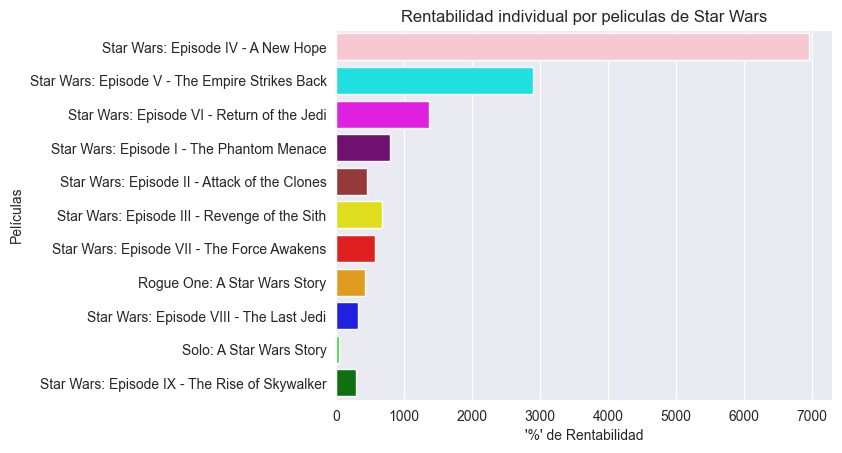

In [430]:
colores=["pink","cyan","magenta","purple","brown","yellow","red","orange","blue","lime","green"]
datos_starwars = starwars.sort_values(by="'%'Rentabilidad", ascending=False)
datos_starwars = sns.barplot(data=starwars, x="'%'Rentabilidad", y="Title", palette=colores)
plt.xlabel("'%' de Rentabilidad")
plt.ylabel("Películas")
plt.title("Rentabilidad individual por peliculas de Star Wars");

In [431]:
data["'%'Rentabilidad"]

0    6949.00
1    2891.00
2    1362.00
3    1662.00
4     747.00
5     793.00
6     297.00
7     718.00
8     866.00
9     445.00
10    780.00
11   1100.00
12   1120.00
13    514.00
14    668.00
15    498.00
16    528.00
17    318.00
18     77.00
19    274.00
20    212.00
21    291.00
22    200.00
23    974.00
24    165.00
25    590.00
26    307.00
27    507.00
28    279.00
29    284.00
30    320.00
31    355.00
32    285.00
33    401.00
34   1014.00
35    299.00
36    576.00
37    361.00
38    311.00
39    429.00
40    332.00
41    403.00
42    374.00
43    320.00
44    574.00
45    583.00
46     43.00
47    671.00
48    284.00
49    605.00
50    599.00
51    607.00
52    291.00
53     90.00
54    116.00
55    101.00
56    858.00
57    378.00
58    505.00
59    203.00
60   2066.00
61   1089.00
62    888.00
63    327.00
64     25.00
Name: '%'Rentabilidad, dtype: float64

In [432]:
data["'%'Rentabilidad"].describe()

count     65.00
mean     663.06
std      924.53
min       25.00
25%      291.00
50%      429.00
75%      718.00
max     6949.00
Name: '%'Rentabilidad, dtype: float64

In [433]:
Q1 = np.percentile(data["'%'Rentabilidad"], 25)
Q2 = np.percentile(data["'%'Rentabilidad"], 50)
Q3 = np.percentile(data["'%'Rentabilidad"], 75)

In [434]:
categoria_rentabilidad= []

for i in data["'%'Rentabilidad"]:
    if i <= Q1:
        categoria_rentabilidad.append("Poco rentable")
    elif i <= Q2:
        categoria_rentabilidad.append("Rentable")
    elif i <= Q3:
        categoria_rentabilidad.append("Muy rentable")
    else:
        categoria_rentabilidad.append("Extremadamente rentable")

In [435]:
categoria_rentabilidad

['Extremadamente rentable',
 'Extremadamente rentable',
 'Extremadamente rentable',
 'Extremadamente rentable',
 'Extremadamente rentable',
 'Extremadamente rentable',
 'Rentable',
 'Muy rentable',
 'Extremadamente rentable',
 'Muy rentable',
 'Extremadamente rentable',
 'Extremadamente rentable',
 'Extremadamente rentable',
 'Muy rentable',
 'Muy rentable',
 'Muy rentable',
 'Muy rentable',
 'Rentable',
 'Poco rentable',
 'Poco rentable',
 'Poco rentable',
 'Poco rentable',
 'Poco rentable',
 'Extremadamente rentable',
 'Poco rentable',
 'Muy rentable',
 'Rentable',
 'Muy rentable',
 'Poco rentable',
 'Poco rentable',
 'Rentable',
 'Rentable',
 'Poco rentable',
 'Rentable',
 'Extremadamente rentable',
 'Rentable',
 'Muy rentable',
 'Rentable',
 'Rentable',
 'Rentable',
 'Rentable',
 'Rentable',
 'Rentable',
 'Rentable',
 'Muy rentable',
 'Muy rentable',
 'Poco rentable',
 'Muy rentable',
 'Poco rentable',
 'Muy rentable',
 'Muy rentable',
 'Muy rentable',
 'Poco rentable',
 'Poco rent

In [436]:
data["Categoria Rent"] = categoria_rentabilidad

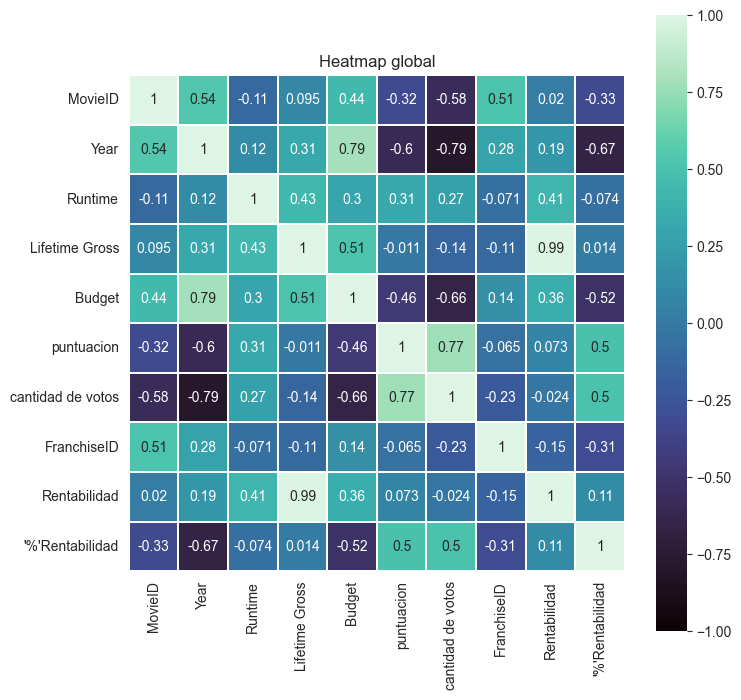

In [437]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(numeric_only=True),
            vmin=-1,
            vmax=1,
            cmap=sns.color_palette("mako", as_cmap=True),
            square=True,
            linewidths=.1,
            annot=True)
plt.title("Heatmap global");

In [438]:
data.head()

,MovieID,Title,Studio,Franquicias,Year,ReleaseDate,Runtime,Lifetime Gross,Budget,puntuacion,cantidad de votos,FranchiseID,Rentabilidad,'%'Rentabilidad,Categoria Rent
0,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,1977,05-25-77,121.00,775398007.00,11000000,7.90,137184,101,764398007.00,6949.00,Extremadamente rentable
1,1002,Star Wars: Episode V - The Empire Strikes Back,Lucasfilm,Star Wars,1980,06-20-80,124.00,538375067.00,18000000,8.10,136665,101,520375067.00,2891.00,Extremadamente rentable
2,1003,Star Wars: Episode VI - Return of the Jedi,Lucasfilm,Star Wars,1983,05-25-83,135.00,475106177.00,32500000,7.90,122877,101,442606177.00,1362.00,Extremadamente rentable
3,1004,Jurassic Park,Universal Pictures,Jurassic Park,1993,06-11-93,127.00,1109802321.00,63000000,7.10,147830,102,1046802321.00,1662.00,Extremadamente rentable
4,1005,The Lost World: Jurassic Park,Universal Pictures,Jurassic Park,1997,05-23-97,129.00,618638999.00,73000000,5.70,50840,102,545638999.00,747.00,Extremadamente rentable


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\1370781943.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Categoria Rent", y="Lifetime Gross", data=data, palette=colores);
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\1370781943.py:1: UserWarning: The palette list has more values (11) than needed (4), which may not be intended.
  sns.violinplot(x="Categoria Rent", y="Lifetime Gross", data=data, palette=colores);


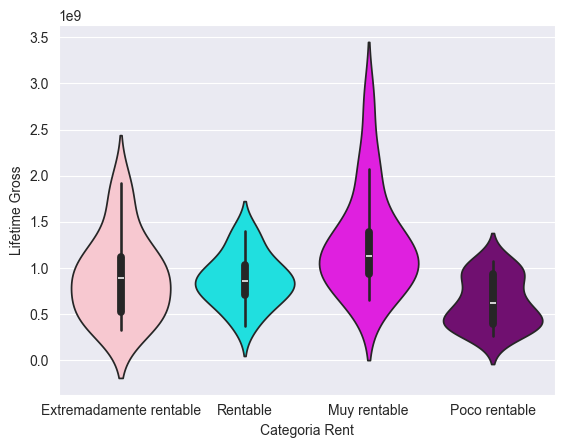

In [439]:
sns.violinplot(x="Categoria Rent", y="Lifetime Gross", data=data, palette=colores);
#plt.yticks(np.arange(0,170,10));

In [440]:
data["Budget"].min()

11000000

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\2007628603.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  violin_rentable.set_yticklabels(valores_y)


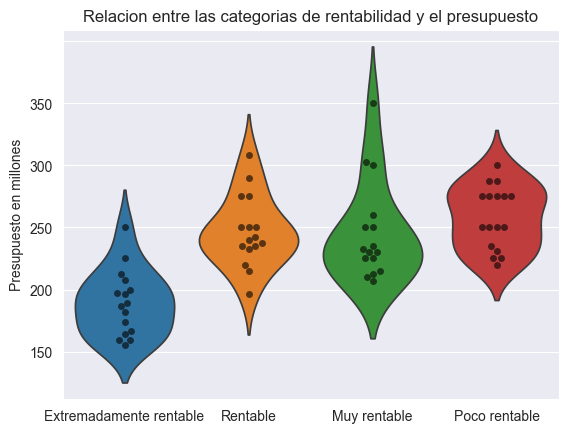

In [441]:
violin_rentable = sns.violinplot(x="Categoria Rent", y="Budget", data=data, hue="Categoria Rent" , inner=None);
violin_rentable = sns.swarmplot(x="Categoria Rent", y= "Budget", data=data, color="k", alpha=0.6)
valores_y = ["100","150","200","250","300","350"]
violin_rentable.set_yticklabels(valores_y)
plt.title("Relacion entre las categorias de rentabilidad y el presupuesto")
plt.ylabel("Presupuesto en millones")
plt.xlabel("");

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\2568443088.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Categoria Rent", y= "'%'Rentabilidad", data=data, palette=colores)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\2568443088.py:1: UserWarning: The palette list has more values (11) than needed (4), which may not be intended.
  sns.swarmplot(x="Categoria Rent", y= "'%'Rentabilidad", data=data, palette=colores)


<Axes: xlabel='Categoria Rent', ylabel="'%'Rentabilidad">

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


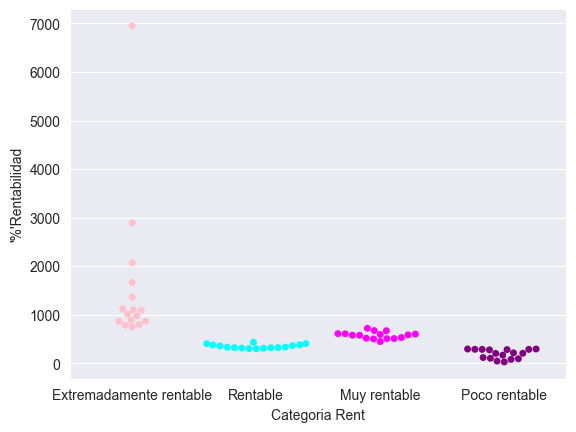

In [442]:
sns.swarmplot(x="Categoria Rent", y= "'%'Rentabilidad", data=data, palette=colores)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8704\3511369827.py:2: UserWarning: The palette list has more values (11) than needed (6), which may not be intended.
  sns.swarmplot(x="Categoria Rent",y="Lifetime Gross" ,data=data, hue="Franquicias",alpha= 0.9, dodge=True, palette=colores);


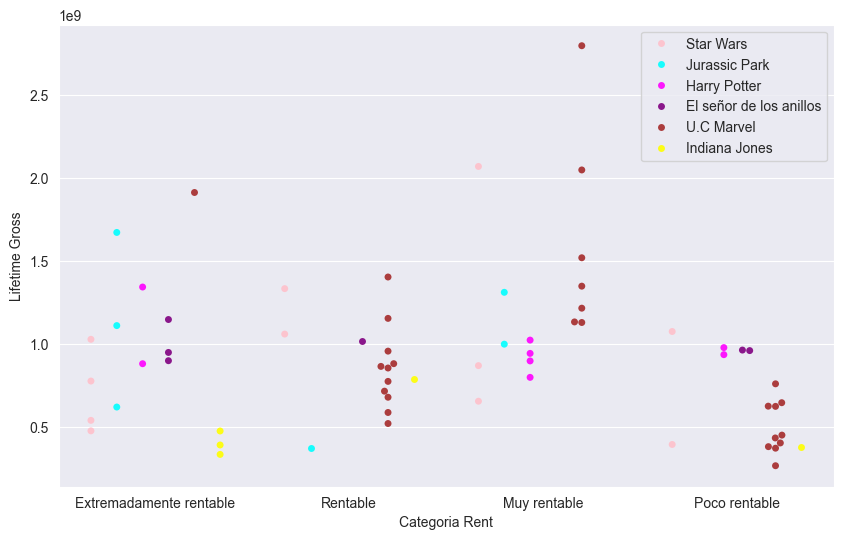

In [443]:
plt.figure(figsize=(10,6))
sns.swarmplot(x="Categoria Rent",y="Lifetime Gross" ,data=data, hue="Franquicias",alpha= 0.9, dodge=True, palette=colores);
plt.legend(bbox_to_anchor=(1,1))

In [444]:
data.head(1)

,MovieID,Title,Studio,Franquicias,Year,ReleaseDate,Runtime,Lifetime Gross,Budget,puntuacion,cantidad de votos,FranchiseID,Rentabilidad,'%'Rentabilidad,Categoria Rent
0,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,1977,05-25-77,121.00,775398007.00,11000000,7.90,137184,101,764398007.00,6949.00,Extremadamente rentable


Text(0.5, 29.00000000000003, 'Presupuesto')

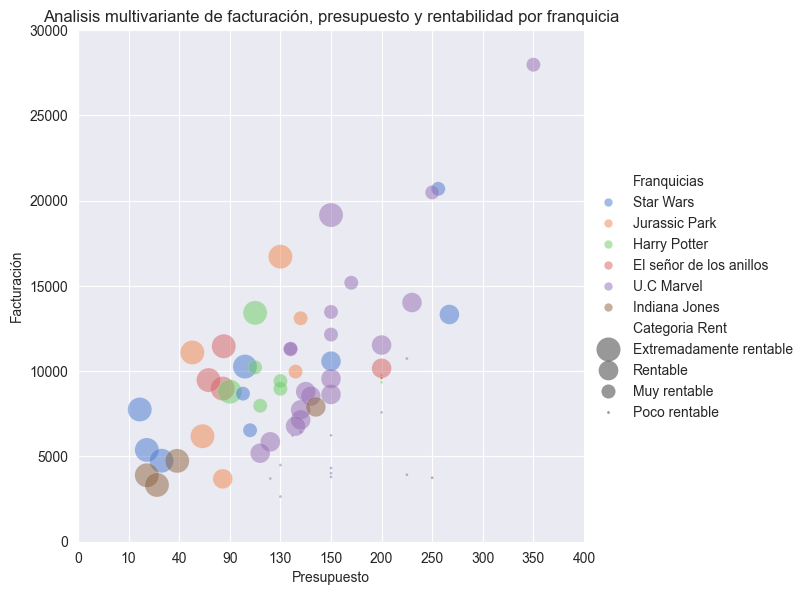

In [445]:
cuatro_variables = sns.relplot(data=data,
            x="Budget",
            y="Lifetime Gross",
            hue="Franquicias", size="Categoria Rent",
            sizes=(4, 300),
            alpha=.5, palette="muted",
            height=6);
valores_x = ["0","10","40","90","130","150","200","250","300","350","400"]
valores_y = ["0","5000","10000","15000","20000","25000","30000"]
cuatro_variables.set_yticklabels(valores_y)
cuatro_variables.set_xticklabels(valores_x)
plt.title("Analisis multivariante de facturación, presupuesto y rentabilidad por franquicia")
plt.ylabel("Facturación")
plt.xlabel("Presupuesto")